In [1]:
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

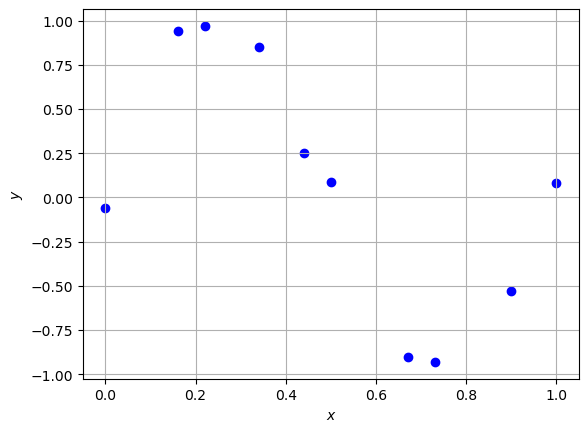

In [3]:
X = np.array([ 0.  ,  0.16,  0.22,  0.34,  0.44,  0.5 ,  0.67,  0.73,  0.9 ,  1.  ])
Y = np.array([-0.06,  0.94,  0.97,  0.85,  0.25,  0.09, -0.9 , -0.93, -0.53,  0.08])

fig, ax = plt.subplots(dpi=100)
ax.scatter(X, Y, marker='o', color='b')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.grid()

In [4]:
W3 = Polynomial.fit(X, Y, 3)
W3.convert().coef

array([ -0.06314113,  10.97825774, -32.58352732,  21.81795457])

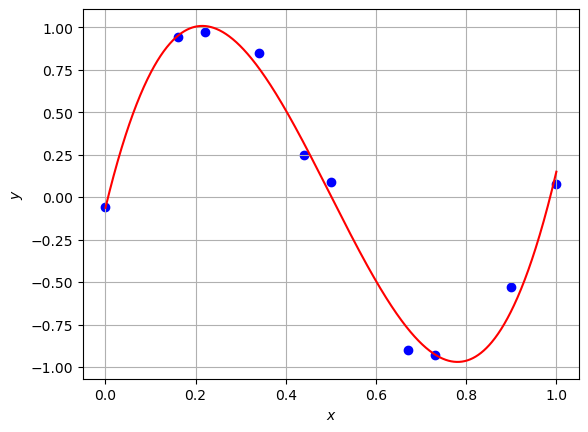

In [5]:
x = np.linspace(0, 1, 1000)
fig, ax = plt.subplots(dpi=100)
ax.scatter(X, Y, marker='o', color='b')
ax.plot(x, W3(x), 'r')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.grid()

In [6]:
np.mean((Y - W3(X)) ** 2)

0.006168386150620877

In [7]:
W9 = Polynomial.fit(X, Y, 9)
W9.convert().coef

array([-6.00000000e-02,  2.20316075e+02, -4.33492219e+03,  3.61547202e+04,
       -1.62771499e+05,  4.32757050e+05, -6.99307115e+05,  6.74161690e+05,
       -3.56090735e+05,  7.92106359e+04])

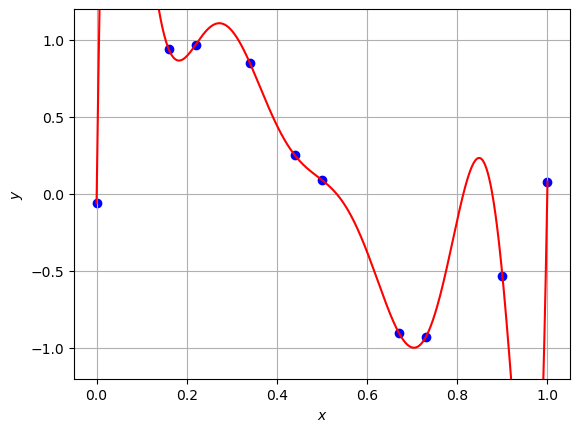

In [8]:
x = np.linspace(0, 1, 1000)
fig, ax = plt.subplots(dpi=100)
ax.scatter(X, Y, marker='o', color='b')
ax.plot(x, W9(x), 'r')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_ylim(-1.2, 1.2)
ax.grid()

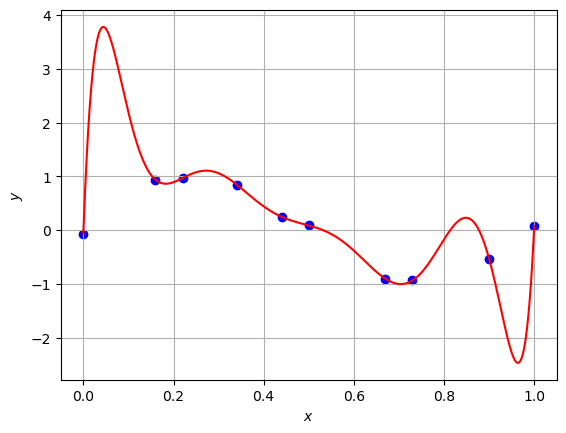

In [9]:
x = np.linspace(0, 1, 1000)
fig, ax = plt.subplots(dpi=100)
ax.scatter(X, Y, marker='o', color='b')
ax.plot(x, W9(x), 'r')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.grid()

In [10]:
np.mean((Y - W9(X)) ** 2)

1.2952340714004825e-27

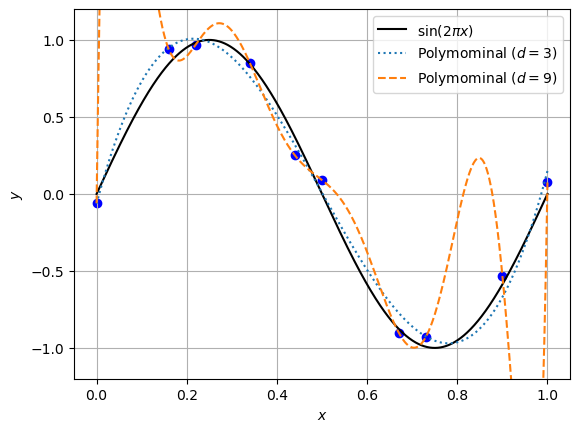

In [11]:
W3 = Polynomial.fit(X, Y, 3)
W9 = Polynomial.fit(X, Y, 9)

x = np.linspace(0, 1, 1000)
fig, ax = plt.subplots(dpi=100)
ax.scatter(X, Y, marker='o', color='b')
ax.plot(x, np.sin(2 * np.pi * x), 'black', label=r'$\sin(2\pi x)$', linestyle="solid")
ax.plot(x, W3(x), label=r'Polymominal ($d=3$)', linestyle="dotted")
ax.plot(x, W9(x), label=r'Polymominal ($d=9$)', linestyle="dashed")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_ylim(-1.2, 1.2)
plt.legend(loc='upper right')
fig.savefig('overfitting.png')
ax.grid()

In [12]:
X_valid = np.array([ 0.05,  0.08,  0.16,  0.28,  0.44,  0.47,  0.55,  0.63,  0.84,   0.99])
Y_valid = np.array([ 0.35,  0.58,  0.87,  0.98,  0.45,  0.01, -0.36, -0.73, -0.85,  -0.06])

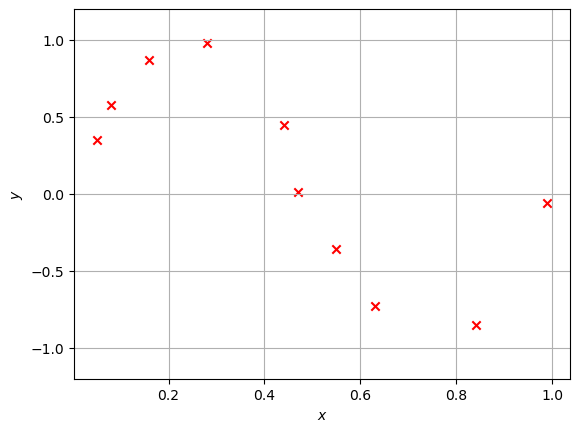

In [13]:
fig, ax = plt.subplots(dpi=100)
ax.scatter(X_valid, Y_valid, marker='x', color='r')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_ylim(-1.2, 1.2)
ax.grid()

In [14]:
for d in range(1, 10):
    W = Polynomial.fit(X, Y, d)
    Y_hat = W(X)
    Y_valid_hat = W(X_valid)
    e_train = np.mean((Y_hat - Y) ** 2)
    e_valid = np.mean((Y_valid_hat - Y_valid) ** 2)
    print(f'd = {d}: MSR = {e_train:.10f} (training), {e_valid:.10f} (validation)')

d = 1: MSR = 0.2911223347 (training), 0.1731786835 (validation)
d = 2: MSR = 0.2911017232 (training), 0.1724489756 (validation)
d = 3: MSR = 0.0061683862 (training), 0.0089782205 (validation)
d = 4: MSR = 0.0059072699 (training), 0.0086822313 (validation)
d = 5: MSR = 0.0027495672 (training), 0.0052849468 (validation)
d = 6: MSR = 0.0025021465 (training), 0.0060748073 (validation)
d = 7: MSR = 0.0024176615 (training), 0.0083442287 (validation)
d = 8: MSR = 0.0023835792 (training), 0.0061707210 (validation)
d = 9: MSR = 0.0000000000 (training), 1.9813186074 (validation)
